# Effects of Advertising on Sales

### LVC 1 - Introduction to Supervised Learning: Regression


## Context and Problem

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, radio, etc. 
- In this case study, we will have a look at the advertising data of a company and try to see its effect on sales.
- We will also try to predict the sales given the different parameters of advertising. 


## Data Information

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- News  - Independent variable quantifying budget for news ads
- Sales - Dependent variable

### Let us start by importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Let us import the files from our system. Note that you can also load the data from the drive. 
# The below code is applicable only if you are working on Google Colab, In case you are using Jupyter Notebook, you can directly use pd.read_csv(filename) to load data into dataframe

#from google.colab import files
#uploaded = files.upload()

In [3]:
Ad_df = pd.read_csv('Advertising.csv')

# we have loaded the data into the Ad_df data frame. Let us now have a quick look.
Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# we can drop the first column as it is just the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [5]:
Ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:** All the variables are of float data type.

### Let us now start with the simple linear regression. We will use one feature at a time and have a look at the target variable. 

In [7]:
# Dataset is stored in a Pandas Dataframe. Let us take out all the variables in a numpy array.
Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)
TV = Ad_df.TV.values.reshape(len(Ad_df['Sales']), 1)
Radio = Ad_df.Radio.values.reshape(len(Ad_df['Sales']), 1)
Newspaper = Ad_df.Newspaper.values.reshape(len(Ad_df['Sales']), 1)

In [8]:
# let us fit the simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

# let us fit the simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# let us fit the simple linear regression model with the Newspaper feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

# let us store the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [9]:
# Let us now calculate R^2
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [10]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


**Observations:** We can see that TV has the highest R^2 value i.e. 61% followed by Radio and Newspaper

Let's try to visualize the best fit line using the regression plot

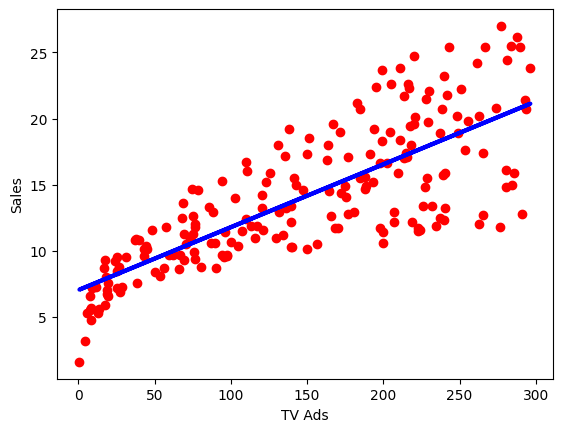

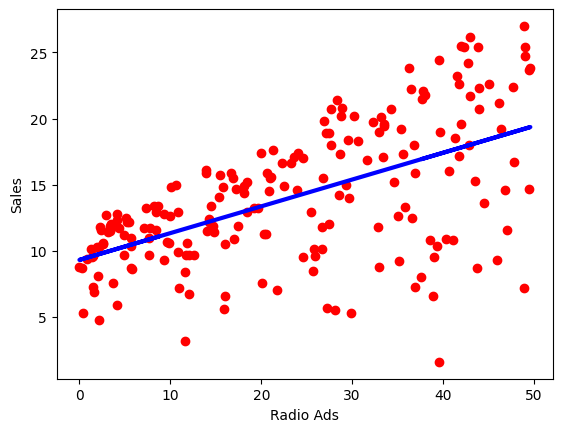

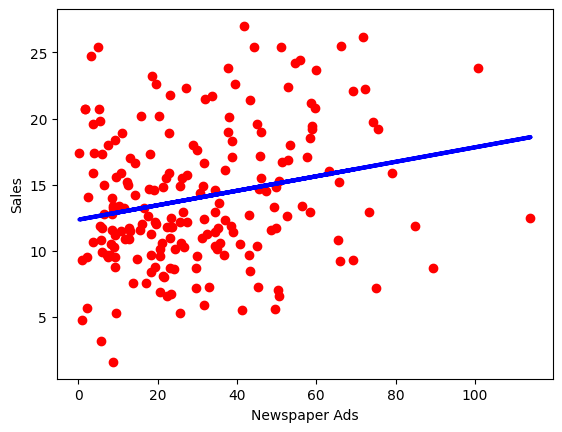

In [11]:
plt.scatter(TV, Sales,  color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='blue', linewidth=3)
plt.show()

plt.scatter(Radio, Sales,  color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='blue', linewidth=3)
plt.show()

plt.scatter(Newspaper, Sales,  color='red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='blue', linewidth=3)
plt.show()


## Multiple Linear Regression

- Let us now build a multiple linear regression model.

In [12]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

LinearRegression()

In [13]:
Ad_df['Sales_Predicted']  = mlr_model.predict(Ad_df[['TV', 'Radio', 'Newspaper']]) 
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2
MSE_MLR = Ad_df['Error'].mean()

In [14]:
MSE_MLR

2.784126314510936

In [15]:
mlr_model.score(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

0.8972106381789522

**Observations:** The R^2 value for the multiple linear regression comes out to be 89.7% i.e. way better than simple linear regression

Let's now try to use statsmodel to get a more detailed model interpretation

In [16]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.58e-96
Time:                        06:20:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [17]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

### Visualizing the confidence bands in Simple linear regression

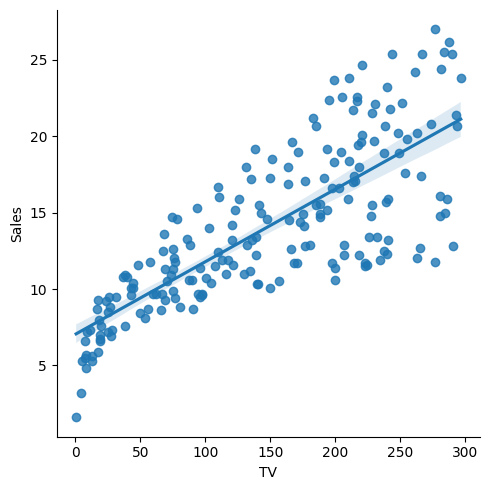

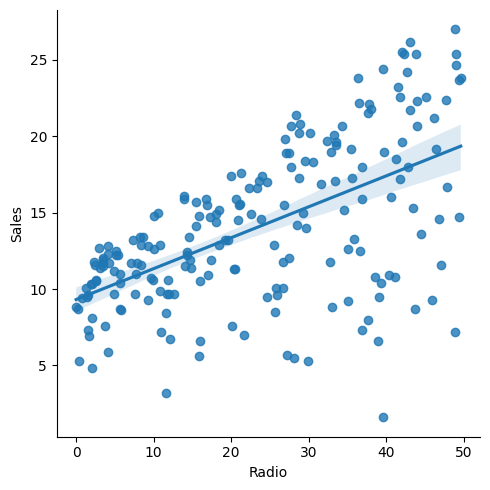

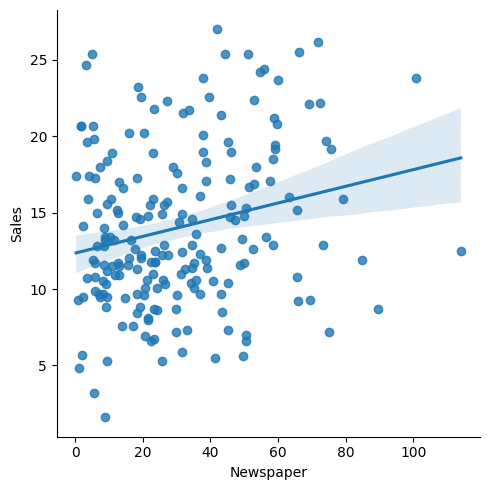

In [18]:
import seaborn as sns
sns.lmplot(x = 'TV', y = 'Sales', data = Ad_df)

sns.lmplot(x = 'Radio', y = 'Sales', data = Ad_df )

sns.lmplot(x = 'Newspaper', y = 'Sales', data = Ad_df)

# LVC  2 - Model Evaluation: Cross validation and Bootstrapping

- We realize that the newspaper can be omitted from the list of significant features owing to the p-value.
- Let us now run the regression analysis adding a multiplicative feature in it.

In [19]:
Ad_df['TVandRadio'] = Ad_df['TV']*Ad_df['Radio']

In [20]:
# let us remove the sales_predicted and the error column generated earlier
Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [21]:
# Let us do the modelling with the new feature.
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          2.92e-144
Time:                        06:20:10   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.0

**Observations**
- We see an increase in the R-square here. However, is this model useful for prediction? Does it predict well for the unseen data? Let us find out!

## Performance assessment, testing and validation

### Train, Test, and Validation set
- We will split data into three sets, one to train the model, one to validate the model performance (not seen during training) and make improvements, and the last to test the model.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
features_base = [i for i in Ad_df.columns if i not in ("Sales" , "TVandRadio")]
features_added = [i for i in Ad_df.columns if i not in "Sales"]
target  = 'Sales'
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

In [24]:
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [25]:
train.shape, validation.shape,test.shape

((144, 5), (36, 5), (20, 5))

In [26]:
# now let us start with the modelling
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train[features_base], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr.score(train[features_base], train[target]))
se_train = (train[target] - mlr.predict(train[features_base]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
se_val = (validation[target] - mlr.predict(validation[features_base]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.8974779821485998
MSE:  2.837595421615533
********Validation set Metrics**************
R-Squared: 0.8998262737955084
MSE:  2.560226335905953


In [27]:
# Can we increase the model performance by adding the new feature? 
# We found that to be the case in the analysis above but let's check the same for the validation dataset

mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9659816168624449
MSE:  0.9415578259667576
********Validation set Metrics**************
R-Squared: 0.9684039133588381
MSE:  0.8075284427888416


**Observations**
- We found the R-squared increased as we would expect after adding a feature. Also the error decreased. Let us now fit a regularized model.

## Regularization 

In [28]:
features_added

['TV', 'Radio', 'Newspaper', 'TVandRadio']

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9659816168449464
MSE:  0.9415578264510786
********Validation set Metrics**************
R-Squared: 0.9684032956351806
MSE:  0.8075442304852385


In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Lasso with the default features
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9651308244925022
MSE:  0.96510598258999
********Validation set Metrics**************
R-Squared: 0.962924111901052
MSE:  0.9475804558198883


In [40]:
#Let us predict on the unseen data using Ridge

rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9783282740440367
MSE:  0.5500690392485159
Intercept is 6.8514577263011445 and Coefficients are [0.01849774 0.02031109 0.00421811 0.00110494]


- We will now evaluate the performance using the LooCV and KFold methods.

### K-Fold and LooCV

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [42]:
ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

# note that the same can be set as LooCV if cv parameter above is set to n, i.e, 200.

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799696, 0.9869301815715691)

## Extra: Statsmodel to fit regularized model

In [44]:
# You can also use the statsmodel for the regularization using the below code
# import statsmodels.formula.api as smf
# We will use the below code to fit a regularized regression.


# Here, lasso is fit
lm3 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 1)
print("*************Parameters**************")
print(lm3.params)

# Here, ridge regularization has been fit
lm4 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit_regularized(method = 'elastic_net', L1_wt = 0)
print("*************Parameters**************")
print(lm4.params)

*************Parameters**************
Intercept     6.471607
TV            0.020325
Radio         0.036049
Newspaper     0.002202
TVandRadio    0.001044
dtype: float64
*************Parameters**************
[6.72841195e+00 1.90668162e-02 2.79916606e-02 1.44424442e-03
 1.08733333e-03]


## Bootstrapping

In [45]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        06:45:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

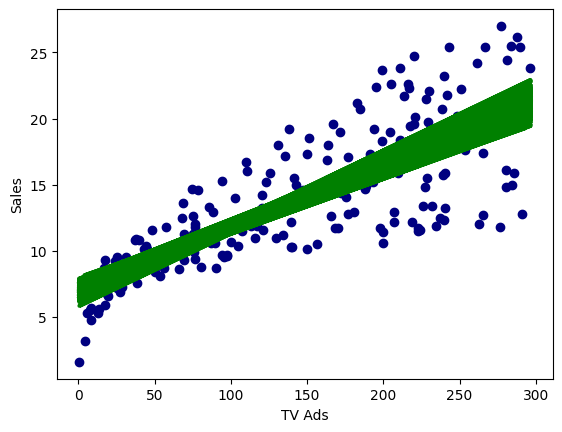

In [46]:
#Now, let us calculate the slopes a 1000 times using bootstrapping

import statsmodels.formula.api as smf


Slope = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3 = smf.ols(formula= 'Sales ~ TV', data = bootstrap_df).fit()
  Slope.append(lm3.params.TV)
  
  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3)
  
plt.scatter(Ad_df['TV'], Ad_df['Sales'],  color=(0,0,0.5))
plt.show()


In [48]:
# Let's now find out the 2.5 and 97.5 percentile for the slopes obtained
import numpy as np

Slope = np.array(Slope)
Sort_Slope = np.sort(Slope)


Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04190175, 0.05287602])

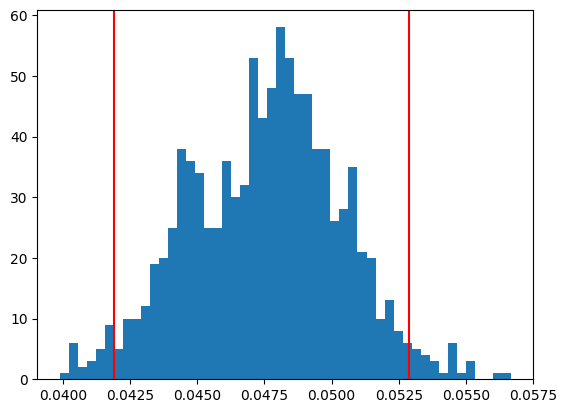

In [49]:
# Plotting the slopes and the upper and the lower limits

plt.hist(Slope, 50)
plt.axvline(Slope_limits[0], color = 'r')
plt.axvline(Slope_limits[1], color = 'r')